In [6]:
%matplotlib inline

In [7]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv
import pandas as pd
from io import StringIO

In [8]:
Refyear = 2000
Refyearind = Refyear-1900
Finyear = 2100
Finyearind = Finyear-1900
EnsembleNumber = 20000
YearNumber = 200

In [9]:
# Read data
# AISM_VUB

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_AISM_VUB_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_AISM_VUB_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_AISM_VUB_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_AISM_VUB_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_AISM_VUB_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_AISM_VUB_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_AISM_VUB_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_AISM_VUB_SU_RCP26 = SL_wTd_nos_base_AISM_VUB_R1_RCP26+SL_wTd_nos_base_AISM_VUB_R2_RCP26+SL_wTd_nos_base_AISM_VUB_R3_RCP26+SL_wTd_nos_base_AISM_VUB_R4_RCP26+SL_wTd_nos_base_AISM_VUB_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    #print(i)
    SL_wTd_nos_base_AISM_VUB_SU_RCP26_offset = SL_wTd_nos_base_AISM_VUB_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R0_RCP26_offset = SL_wTd_nos_base_AISM_VUB_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R1_RCP26_offset = SL_wTd_nos_base_AISM_VUB_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R2_RCP26_offset = SL_wTd_nos_base_AISM_VUB_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R3_RCP26_offset = SL_wTd_nos_base_AISM_VUB_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R4_RCP26_offset = SL_wTd_nos_base_AISM_VUB_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R5_RCP26_offset = SL_wTd_nos_base_AISM_VUB_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_AISM_VUB_SU_RCP26[i,yr] = SL_wTd_nos_base_AISM_VUB_SU_RCP26[i,yr]-SL_wTd_nos_base_AISM_VUB_SU_RCP26_offset
        SL_wTd_nos_base_AISM_VUB_R0_RCP26[i,yr] = SL_wTd_nos_base_AISM_VUB_R0_RCP26[i,yr]-SL_wTd_nos_base_AISM_VUB_R0_RCP26_offset
        SL_wTd_nos_base_AISM_VUB_R1_RCP26[i,yr] = SL_wTd_nos_base_AISM_VUB_R1_RCP26[i,yr]-SL_wTd_nos_base_AISM_VUB_R1_RCP26_offset
        SL_wTd_nos_base_AISM_VUB_R2_RCP26[i,yr] = SL_wTd_nos_base_AISM_VUB_R2_RCP26[i,yr]-SL_wTd_nos_base_AISM_VUB_R2_RCP26_offset
        SL_wTd_nos_base_AISM_VUB_R3_RCP26[i,yr] = SL_wTd_nos_base_AISM_VUB_R3_RCP26[i,yr]-SL_wTd_nos_base_AISM_VUB_R3_RCP26_offset
        SL_wTd_nos_base_AISM_VUB_R4_RCP26[i,yr] = SL_wTd_nos_base_AISM_VUB_R4_RCP26[i,yr]-SL_wTd_nos_base_AISM_VUB_R4_RCP26_offset
        SL_wTd_nos_base_AISM_VUB_R5_RCP26[i,yr] = SL_wTd_nos_base_AISM_VUB_R5_RCP26[i,yr]-SL_wTd_nos_base_AISM_VUB_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_AISM_VUB_R0_RCP26[:,0])):
    SL_wTd_nos_base_AISM_VUB_R0_RCP26_rate = np.diff(SL_wTd_nos_base_AISM_VUB_R0_RCP26[i,:])
    SL_wTd_nos_base_AISM_VUB_R0_RCP26_rate = np.append(SL_wTd_nos_base_AISM_VUB_R0_RCP26_rate,SL_wTd_nos_base_AISM_VUB_R0_RCP26_rate[-1])
    SL_wTd_nos_base_AISM_VUB_R0_RCP26[i,:] = SL_wTd_nos_base_AISM_VUB_R0_RCP26_rate



In [10]:
# Read data
# BISI_LBL

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_BISI_LBL_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_BISI_LBL_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_BISI_LBL_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_BISI_LBL_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_BISI_LBL_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_BISI_LBL_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_BISI_LBL_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_BISI_LBL_SU_RCP26 = SL_wTd_nos_base_BISI_LBL_R1_RCP26+SL_wTd_nos_base_BISI_LBL_R2_RCP26+SL_wTd_nos_base_BISI_LBL_R3_RCP26+SL_wTd_nos_base_BISI_LBL_R4_RCP26+SL_wTd_nos_base_BISI_LBL_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_BISI_LBL_SU_RCP26_offset = SL_wTd_nos_base_BISI_LBL_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R0_RCP26_offset = SL_wTd_nos_base_BISI_LBL_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R1_RCP26_offset = SL_wTd_nos_base_BISI_LBL_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R2_RCP26_offset = SL_wTd_nos_base_BISI_LBL_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R3_RCP26_offset = SL_wTd_nos_base_BISI_LBL_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R4_RCP26_offset = SL_wTd_nos_base_BISI_LBL_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R5_RCP26_offset = SL_wTd_nos_base_BISI_LBL_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_BISI_LBL_SU_RCP26[i,yr] = SL_wTd_nos_base_BISI_LBL_SU_RCP26[i,yr]-SL_wTd_nos_base_BISI_LBL_SU_RCP26_offset
        SL_wTd_nos_base_BISI_LBL_R0_RCP26[i,yr] = SL_wTd_nos_base_BISI_LBL_R0_RCP26[i,yr]-SL_wTd_nos_base_BISI_LBL_R0_RCP26_offset
        SL_wTd_nos_base_BISI_LBL_R1_RCP26[i,yr] = SL_wTd_nos_base_BISI_LBL_R1_RCP26[i,yr]-SL_wTd_nos_base_BISI_LBL_R1_RCP26_offset
        SL_wTd_nos_base_BISI_LBL_R2_RCP26[i,yr] = SL_wTd_nos_base_BISI_LBL_R2_RCP26[i,yr]-SL_wTd_nos_base_BISI_LBL_R2_RCP26_offset
        SL_wTd_nos_base_BISI_LBL_R3_RCP26[i,yr] = SL_wTd_nos_base_BISI_LBL_R3_RCP26[i,yr]-SL_wTd_nos_base_BISI_LBL_R3_RCP26_offset
        SL_wTd_nos_base_BISI_LBL_R4_RCP26[i,yr] = SL_wTd_nos_base_BISI_LBL_R4_RCP26[i,yr]-SL_wTd_nos_base_BISI_LBL_R4_RCP26_offset
        SL_wTd_nos_base_BISI_LBL_R5_RCP26[i,yr] = SL_wTd_nos_base_BISI_LBL_R5_RCP26[i,yr]-SL_wTd_nos_base_BISI_LBL_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_BISI_LBL_R0_RCP26[:,0])):
    SL_wTd_nos_base_BISI_LBL_R0_RCP26_rate = np.diff(SL_wTd_nos_base_BISI_LBL_R0_RCP26[i,:])
    SL_wTd_nos_base_BISI_LBL_R0_RCP26_rate = np.append(SL_wTd_nos_base_BISI_LBL_R0_RCP26_rate,SL_wTd_nos_base_BISI_LBL_R0_RCP26_rate[-1])
    SL_wTd_nos_base_BISI_LBL_R0_RCP26[i,:] = SL_wTd_nos_base_BISI_LBL_R0_RCP26_rate



In [11]:
# Read data
# CISM_NCA

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_CISM_NCA_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_CISM_NCA_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_CISM_NCA_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_CISM_NCA_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_CISM_NCA_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_CISM_NCA_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_CISM_NCA_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_CISM_NCA_SU_RCP26 = SL_wTd_nos_base_CISM_NCA_R1_RCP26+SL_wTd_nos_base_CISM_NCA_R2_RCP26+SL_wTd_nos_base_CISM_NCA_R3_RCP26+SL_wTd_nos_base_CISM_NCA_R4_RCP26+SL_wTd_nos_base_CISM_NCA_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_CISM_NCA_SU_RCP26_offset = SL_wTd_nos_base_CISM_NCA_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R0_RCP26_offset = SL_wTd_nos_base_CISM_NCA_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R1_RCP26_offset = SL_wTd_nos_base_CISM_NCA_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R2_RCP26_offset = SL_wTd_nos_base_CISM_NCA_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R3_RCP26_offset = SL_wTd_nos_base_CISM_NCA_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R4_RCP26_offset = SL_wTd_nos_base_CISM_NCA_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R5_RCP26_offset = SL_wTd_nos_base_CISM_NCA_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_CISM_NCA_SU_RCP26[i,yr] = SL_wTd_nos_base_CISM_NCA_SU_RCP26[i,yr]-SL_wTd_nos_base_CISM_NCA_SU_RCP26_offset
        SL_wTd_nos_base_CISM_NCA_R0_RCP26[i,yr] = SL_wTd_nos_base_CISM_NCA_R0_RCP26[i,yr]-SL_wTd_nos_base_CISM_NCA_R0_RCP26_offset
        SL_wTd_nos_base_CISM_NCA_R1_RCP26[i,yr] = SL_wTd_nos_base_CISM_NCA_R1_RCP26[i,yr]-SL_wTd_nos_base_CISM_NCA_R1_RCP26_offset
        SL_wTd_nos_base_CISM_NCA_R2_RCP26[i,yr] = SL_wTd_nos_base_CISM_NCA_R2_RCP26[i,yr]-SL_wTd_nos_base_CISM_NCA_R2_RCP26_offset
        SL_wTd_nos_base_CISM_NCA_R3_RCP26[i,yr] = SL_wTd_nos_base_CISM_NCA_R3_RCP26[i,yr]-SL_wTd_nos_base_CISM_NCA_R3_RCP26_offset
        SL_wTd_nos_base_CISM_NCA_R4_RCP26[i,yr] = SL_wTd_nos_base_CISM_NCA_R4_RCP26[i,yr]-SL_wTd_nos_base_CISM_NCA_R4_RCP26_offset
        SL_wTd_nos_base_CISM_NCA_R5_RCP26[i,yr] = SL_wTd_nos_base_CISM_NCA_R5_RCP26[i,yr]-SL_wTd_nos_base_CISM_NCA_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_CISM_NCA_R0_RCP26[:,0])):
    SL_wTd_nos_base_CISM_NCA_R0_RCP26_rate = np.diff(SL_wTd_nos_base_CISM_NCA_R0_RCP26[i,:])
    SL_wTd_nos_base_CISM_NCA_R0_RCP26_rate = np.append(SL_wTd_nos_base_CISM_NCA_R0_RCP26_rate,SL_wTd_nos_base_CISM_NCA_R0_RCP26_rate[-1])
    SL_wTd_nos_base_CISM_NCA_R0_RCP26[i,:] = SL_wTd_nos_base_CISM_NCA_R0_RCP26_rate



In [12]:
# Read data
# FETI_VUB

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_FETI_VUB_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_FETI_VUB_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_FETI_VUB_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_FETI_VUB_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_FETI_VUB_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_FETI_VUB_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_FETI_VUB_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_FETI_VUB_SU_RCP26 = SL_wTd_nos_base_FETI_VUB_R1_RCP26+SL_wTd_nos_base_FETI_VUB_R2_RCP26+SL_wTd_nos_base_FETI_VUB_R3_RCP26+SL_wTd_nos_base_FETI_VUB_R4_RCP26+SL_wTd_nos_base_FETI_VUB_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_FETI_VUB_SU_RCP26_offset = SL_wTd_nos_base_FETI_VUB_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R0_RCP26_offset = SL_wTd_nos_base_FETI_VUB_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R1_RCP26_offset = SL_wTd_nos_base_FETI_VUB_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R2_RCP26_offset = SL_wTd_nos_base_FETI_VUB_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R3_RCP26_offset = SL_wTd_nos_base_FETI_VUB_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R4_RCP26_offset = SL_wTd_nos_base_FETI_VUB_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R5_RCP26_offset = SL_wTd_nos_base_FETI_VUB_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_FETI_VUB_SU_RCP26[i,yr] = SL_wTd_nos_base_FETI_VUB_SU_RCP26[i,yr]-SL_wTd_nos_base_FETI_VUB_SU_RCP26_offset
        SL_wTd_nos_base_FETI_VUB_R0_RCP26[i,yr] = SL_wTd_nos_base_FETI_VUB_R0_RCP26[i,yr]-SL_wTd_nos_base_FETI_VUB_R0_RCP26_offset
        SL_wTd_nos_base_FETI_VUB_R1_RCP26[i,yr] = SL_wTd_nos_base_FETI_VUB_R1_RCP26[i,yr]-SL_wTd_nos_base_FETI_VUB_R1_RCP26_offset
        SL_wTd_nos_base_FETI_VUB_R2_RCP26[i,yr] = SL_wTd_nos_base_FETI_VUB_R2_RCP26[i,yr]-SL_wTd_nos_base_FETI_VUB_R2_RCP26_offset
        SL_wTd_nos_base_FETI_VUB_R3_RCP26[i,yr] = SL_wTd_nos_base_FETI_VUB_R3_RCP26[i,yr]-SL_wTd_nos_base_FETI_VUB_R3_RCP26_offset
        SL_wTd_nos_base_FETI_VUB_R4_RCP26[i,yr] = SL_wTd_nos_base_FETI_VUB_R4_RCP26[i,yr]-SL_wTd_nos_base_FETI_VUB_R4_RCP26_offset
        SL_wTd_nos_base_FETI_VUB_R5_RCP26[i,yr] = SL_wTd_nos_base_FETI_VUB_R5_RCP26[i,yr]-SL_wTd_nos_base_FETI_VUB_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_FETI_VUB_R0_RCP26[:,0])):
    SL_wTd_nos_base_FETI_VUB_R0_RCP26_rate = np.diff(SL_wTd_nos_base_FETI_VUB_R0_RCP26[i,:])
    SL_wTd_nos_base_FETI_VUB_R0_RCP26_rate = np.append(SL_wTd_nos_base_FETI_VUB_R0_RCP26_rate,SL_wTd_nos_base_FETI_VUB_R0_RCP26_rate[-1])
    SL_wTd_nos_base_FETI_VUB_R0_RCP26[i,:] = SL_wTd_nos_base_FETI_VUB_R0_RCP26_rate



In [13]:
# Read data
# GRIS_LSC

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_GRIS_LSC_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_GRIS_LSC_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_GRIS_LSC_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_GRIS_LSC_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_GRIS_LSC_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_GRIS_LSC_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_GRIS_LSC_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_GRIS_LSC_SU_RCP26 = SL_wTd_nos_base_GRIS_LSC_R1_RCP26+SL_wTd_nos_base_GRIS_LSC_R2_RCP26+SL_wTd_nos_base_GRIS_LSC_R3_RCP26+SL_wTd_nos_base_GRIS_LSC_R4_RCP26+SL_wTd_nos_base_GRIS_LSC_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_GRIS_LSC_SU_RCP26_offset = SL_wTd_nos_base_GRIS_LSC_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R0_RCP26_offset = SL_wTd_nos_base_GRIS_LSC_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R1_RCP26_offset = SL_wTd_nos_base_GRIS_LSC_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R2_RCP26_offset = SL_wTd_nos_base_GRIS_LSC_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R3_RCP26_offset = SL_wTd_nos_base_GRIS_LSC_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R4_RCP26_offset = SL_wTd_nos_base_GRIS_LSC_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R5_RCP26_offset = SL_wTd_nos_base_GRIS_LSC_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_GRIS_LSC_SU_RCP26[i,yr] = SL_wTd_nos_base_GRIS_LSC_SU_RCP26[i,yr]-SL_wTd_nos_base_GRIS_LSC_SU_RCP26_offset
        SL_wTd_nos_base_GRIS_LSC_R0_RCP26[i,yr] = SL_wTd_nos_base_GRIS_LSC_R0_RCP26[i,yr]-SL_wTd_nos_base_GRIS_LSC_R0_RCP26_offset
        SL_wTd_nos_base_GRIS_LSC_R1_RCP26[i,yr] = SL_wTd_nos_base_GRIS_LSC_R1_RCP26[i,yr]-SL_wTd_nos_base_GRIS_LSC_R1_RCP26_offset
        SL_wTd_nos_base_GRIS_LSC_R2_RCP26[i,yr] = SL_wTd_nos_base_GRIS_LSC_R2_RCP26[i,yr]-SL_wTd_nos_base_GRIS_LSC_R2_RCP26_offset
        SL_wTd_nos_base_GRIS_LSC_R3_RCP26[i,yr] = SL_wTd_nos_base_GRIS_LSC_R3_RCP26[i,yr]-SL_wTd_nos_base_GRIS_LSC_R3_RCP26_offset
        SL_wTd_nos_base_GRIS_LSC_R4_RCP26[i,yr] = SL_wTd_nos_base_GRIS_LSC_R4_RCP26[i,yr]-SL_wTd_nos_base_GRIS_LSC_R4_RCP26_offset
        SL_wTd_nos_base_GRIS_LSC_R5_RCP26[i,yr] = SL_wTd_nos_base_GRIS_LSC_R5_RCP26[i,yr]-SL_wTd_nos_base_GRIS_LSC_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_GRIS_LSC_R0_RCP26[:,0])):
    SL_wTd_nos_base_GRIS_LSC_R0_RCP26_rate = np.diff(SL_wTd_nos_base_GRIS_LSC_R0_RCP26[i,:])
    SL_wTd_nos_base_GRIS_LSC_R0_RCP26_rate = np.append(SL_wTd_nos_base_GRIS_LSC_R0_RCP26_rate,SL_wTd_nos_base_GRIS_LSC_R0_RCP26_rate[-1])
    SL_wTd_nos_base_GRIS_LSC_R0_RCP26[i,:] = SL_wTd_nos_base_GRIS_LSC_R0_RCP26_rate



In [14]:
# Read data
# IMAU_VUB

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_IMAU_VUB_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_IMAU_VUB_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_IMAU_VUB_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_IMAU_VUB_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_IMAU_VUB_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_IMAU_VUB_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_IMAU_VUB_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_IMAU_VUB_SU_RCP26 = SL_wTd_nos_base_IMAU_VUB_R1_RCP26+SL_wTd_nos_base_IMAU_VUB_R2_RCP26+SL_wTd_nos_base_IMAU_VUB_R3_RCP26+SL_wTd_nos_base_IMAU_VUB_R4_RCP26+SL_wTd_nos_base_IMAU_VUB_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_IMAU_VUB_SU_RCP26_offset = SL_wTd_nos_base_IMAU_VUB_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R0_RCP26_offset = SL_wTd_nos_base_IMAU_VUB_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R1_RCP26_offset = SL_wTd_nos_base_IMAU_VUB_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R2_RCP26_offset = SL_wTd_nos_base_IMAU_VUB_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R3_RCP26_offset = SL_wTd_nos_base_IMAU_VUB_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R4_RCP26_offset = SL_wTd_nos_base_IMAU_VUB_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R5_RCP26_offset = SL_wTd_nos_base_IMAU_VUB_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_IMAU_VUB_SU_RCP26[i,yr] = SL_wTd_nos_base_IMAU_VUB_SU_RCP26[i,yr]-SL_wTd_nos_base_IMAU_VUB_SU_RCP26_offset
        SL_wTd_nos_base_IMAU_VUB_R0_RCP26[i,yr] = SL_wTd_nos_base_IMAU_VUB_R0_RCP26[i,yr]-SL_wTd_nos_base_IMAU_VUB_R0_RCP26_offset
        SL_wTd_nos_base_IMAU_VUB_R1_RCP26[i,yr] = SL_wTd_nos_base_IMAU_VUB_R1_RCP26[i,yr]-SL_wTd_nos_base_IMAU_VUB_R1_RCP26_offset
        SL_wTd_nos_base_IMAU_VUB_R2_RCP26[i,yr] = SL_wTd_nos_base_IMAU_VUB_R2_RCP26[i,yr]-SL_wTd_nos_base_IMAU_VUB_R2_RCP26_offset
        SL_wTd_nos_base_IMAU_VUB_R3_RCP26[i,yr] = SL_wTd_nos_base_IMAU_VUB_R3_RCP26[i,yr]-SL_wTd_nos_base_IMAU_VUB_R3_RCP26_offset
        SL_wTd_nos_base_IMAU_VUB_R4_RCP26[i,yr] = SL_wTd_nos_base_IMAU_VUB_R4_RCP26[i,yr]-SL_wTd_nos_base_IMAU_VUB_R4_RCP26_offset
        SL_wTd_nos_base_IMAU_VUB_R5_RCP26[i,yr] = SL_wTd_nos_base_IMAU_VUB_R5_RCP26[i,yr]-SL_wTd_nos_base_IMAU_VUB_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_IMAU_VUB_R0_RCP26[:,0])):
    SL_wTd_nos_base_IMAU_VUB_R0_RCP26_rate = np.diff(SL_wTd_nos_base_IMAU_VUB_R0_RCP26[i,:])
    SL_wTd_nos_base_IMAU_VUB_R0_RCP26_rate = np.append(SL_wTd_nos_base_IMAU_VUB_R0_RCP26_rate,SL_wTd_nos_base_IMAU_VUB_R0_RCP26_rate[-1])
    SL_wTd_nos_base_IMAU_VUB_R0_RCP26[i,:] = SL_wTd_nos_base_IMAU_VUB_R0_RCP26_rate



In [15]:
# Read data
# ISSM_JPL

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_ISSM_JPL_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_ISSM_JPL_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_ISSM_JPL_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_ISSM_JPL_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_ISSM_JPL_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_ISSM_JPL_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_ISSM_JPL_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_ISSM_JPL_SU_RCP26 = SL_wTd_nos_base_ISSM_JPL_R1_RCP26+SL_wTd_nos_base_ISSM_JPL_R2_RCP26+SL_wTd_nos_base_ISSM_JPL_R3_RCP26+SL_wTd_nos_base_ISSM_JPL_R4_RCP26+SL_wTd_nos_base_ISSM_JPL_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_ISSM_JPL_SU_RCP26_offset = SL_wTd_nos_base_ISSM_JPL_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R0_RCP26_offset = SL_wTd_nos_base_ISSM_JPL_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R1_RCP26_offset = SL_wTd_nos_base_ISSM_JPL_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R2_RCP26_offset = SL_wTd_nos_base_ISSM_JPL_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R3_RCP26_offset = SL_wTd_nos_base_ISSM_JPL_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R4_RCP26_offset = SL_wTd_nos_base_ISSM_JPL_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R5_RCP26_offset = SL_wTd_nos_base_ISSM_JPL_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_ISSM_JPL_SU_RCP26[i,yr] = SL_wTd_nos_base_ISSM_JPL_SU_RCP26[i,yr]-SL_wTd_nos_base_ISSM_JPL_SU_RCP26_offset
        SL_wTd_nos_base_ISSM_JPL_R0_RCP26[i,yr] = SL_wTd_nos_base_ISSM_JPL_R0_RCP26[i,yr]-SL_wTd_nos_base_ISSM_JPL_R0_RCP26_offset
        SL_wTd_nos_base_ISSM_JPL_R1_RCP26[i,yr] = SL_wTd_nos_base_ISSM_JPL_R1_RCP26[i,yr]-SL_wTd_nos_base_ISSM_JPL_R1_RCP26_offset
        SL_wTd_nos_base_ISSM_JPL_R2_RCP26[i,yr] = SL_wTd_nos_base_ISSM_JPL_R2_RCP26[i,yr]-SL_wTd_nos_base_ISSM_JPL_R2_RCP26_offset
        SL_wTd_nos_base_ISSM_JPL_R3_RCP26[i,yr] = SL_wTd_nos_base_ISSM_JPL_R3_RCP26[i,yr]-SL_wTd_nos_base_ISSM_JPL_R3_RCP26_offset
        SL_wTd_nos_base_ISSM_JPL_R4_RCP26[i,yr] = SL_wTd_nos_base_ISSM_JPL_R4_RCP26[i,yr]-SL_wTd_nos_base_ISSM_JPL_R4_RCP26_offset
        SL_wTd_nos_base_ISSM_JPL_R5_RCP26[i,yr] = SL_wTd_nos_base_ISSM_JPL_R5_RCP26[i,yr]-SL_wTd_nos_base_ISSM_JPL_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_ISSM_JPL_R0_RCP26[:,0])):
    SL_wTd_nos_base_ISSM_JPL_R0_RCP26_rate = np.diff(SL_wTd_nos_base_ISSM_JPL_R0_RCP26[i,:])
    SL_wTd_nos_base_ISSM_JPL_R0_RCP26_rate = np.append(SL_wTd_nos_base_ISSM_JPL_R0_RCP26_rate,SL_wTd_nos_base_ISSM_JPL_R0_RCP26_rate[-1])
    SL_wTd_nos_base_ISSM_JPL_R0_RCP26[i,:] = SL_wTd_nos_base_ISSM_JPL_R0_RCP26_rate



In [16]:
# Read data
# ISSM_UCI

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_ISSM_UCI_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_ISSM_UCI_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_ISSM_UCI_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_ISSM_UCI_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_ISSM_UCI_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_ISSM_UCI_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_ISSM_UCI_SU_RCP26 = SL_wTd_nos_base_ISSM_UCI_R1_RCP26+SL_wTd_nos_base_ISSM_UCI_R2_RCP26+SL_wTd_nos_base_ISSM_UCI_R3_RCP26+SL_wTd_nos_base_ISSM_UCI_R4_RCP26+SL_wTd_nos_base_ISSM_UCI_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_ISSM_UCI_SU_RCP26_offset = SL_wTd_nos_base_ISSM_UCI_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R0_RCP26_offset = SL_wTd_nos_base_ISSM_UCI_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R1_RCP26_offset = SL_wTd_nos_base_ISSM_UCI_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R2_RCP26_offset = SL_wTd_nos_base_ISSM_UCI_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R3_RCP26_offset = SL_wTd_nos_base_ISSM_UCI_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R4_RCP26_offset = SL_wTd_nos_base_ISSM_UCI_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R5_RCP26_offset = SL_wTd_nos_base_ISSM_UCI_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_ISSM_UCI_SU_RCP26[i,yr] = SL_wTd_nos_base_ISSM_UCI_SU_RCP26[i,yr]-SL_wTd_nos_base_ISSM_UCI_SU_RCP26_offset
        SL_wTd_nos_base_ISSM_UCI_R0_RCP26[i,yr] = SL_wTd_nos_base_ISSM_UCI_R0_RCP26[i,yr]-SL_wTd_nos_base_ISSM_UCI_R0_RCP26_offset
        SL_wTd_nos_base_ISSM_UCI_R1_RCP26[i,yr] = SL_wTd_nos_base_ISSM_UCI_R1_RCP26[i,yr]-SL_wTd_nos_base_ISSM_UCI_R1_RCP26_offset
        SL_wTd_nos_base_ISSM_UCI_R2_RCP26[i,yr] = SL_wTd_nos_base_ISSM_UCI_R2_RCP26[i,yr]-SL_wTd_nos_base_ISSM_UCI_R2_RCP26_offset
        SL_wTd_nos_base_ISSM_UCI_R3_RCP26[i,yr] = SL_wTd_nos_base_ISSM_UCI_R3_RCP26[i,yr]-SL_wTd_nos_base_ISSM_UCI_R3_RCP26_offset
        SL_wTd_nos_base_ISSM_UCI_R4_RCP26[i,yr] = SL_wTd_nos_base_ISSM_UCI_R4_RCP26[i,yr]-SL_wTd_nos_base_ISSM_UCI_R4_RCP26_offset
        SL_wTd_nos_base_ISSM_UCI_R5_RCP26[i,yr] = SL_wTd_nos_base_ISSM_UCI_R5_RCP26[i,yr]-SL_wTd_nos_base_ISSM_UCI_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_ISSM_UCI_R0_RCP26[:,0])):
    SL_wTd_nos_base_ISSM_UCI_R0_RCP26_rate = np.diff(SL_wTd_nos_base_ISSM_UCI_R0_RCP26[i,:])
    SL_wTd_nos_base_ISSM_UCI_R0_RCP26_rate = np.append(SL_wTd_nos_base_ISSM_UCI_R0_RCP26_rate,SL_wTd_nos_base_ISSM_UCI_R0_RCP26_rate[-1])
    SL_wTd_nos_base_ISSM_UCI_R0_RCP26[i,:] = SL_wTd_nos_base_ISSM_UCI_R0_RCP26_rate



In [17]:
# Read data
# MALI_LAN

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_MALI_LAN_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_MALI_LAN_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_MALI_LAN_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_MALI_LAN_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_MALI_LAN_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_MALI_LAN_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_MALI_LAN_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_MALI_LAN_SU_RCP26 = SL_wTd_nos_base_MALI_LAN_R1_RCP26+SL_wTd_nos_base_MALI_LAN_R2_RCP26+SL_wTd_nos_base_MALI_LAN_R3_RCP26+SL_wTd_nos_base_MALI_LAN_R4_RCP26+SL_wTd_nos_base_MALI_LAN_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_MALI_LAN_SU_RCP26_offset = SL_wTd_nos_base_MALI_LAN_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R0_RCP26_offset = SL_wTd_nos_base_MALI_LAN_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R1_RCP26_offset = SL_wTd_nos_base_MALI_LAN_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R2_RCP26_offset = SL_wTd_nos_base_MALI_LAN_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R3_RCP26_offset = SL_wTd_nos_base_MALI_LAN_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R4_RCP26_offset = SL_wTd_nos_base_MALI_LAN_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R5_RCP26_offset = SL_wTd_nos_base_MALI_LAN_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_MALI_LAN_SU_RCP26[i,yr] = SL_wTd_nos_base_MALI_LAN_SU_RCP26[i,yr]-SL_wTd_nos_base_MALI_LAN_SU_RCP26_offset
        SL_wTd_nos_base_MALI_LAN_R0_RCP26[i,yr] = SL_wTd_nos_base_MALI_LAN_R0_RCP26[i,yr]-SL_wTd_nos_base_MALI_LAN_R0_RCP26_offset
        SL_wTd_nos_base_MALI_LAN_R1_RCP26[i,yr] = SL_wTd_nos_base_MALI_LAN_R1_RCP26[i,yr]-SL_wTd_nos_base_MALI_LAN_R1_RCP26_offset
        SL_wTd_nos_base_MALI_LAN_R2_RCP26[i,yr] = SL_wTd_nos_base_MALI_LAN_R2_RCP26[i,yr]-SL_wTd_nos_base_MALI_LAN_R2_RCP26_offset
        SL_wTd_nos_base_MALI_LAN_R3_RCP26[i,yr] = SL_wTd_nos_base_MALI_LAN_R3_RCP26[i,yr]-SL_wTd_nos_base_MALI_LAN_R3_RCP26_offset
        SL_wTd_nos_base_MALI_LAN_R4_RCP26[i,yr] = SL_wTd_nos_base_MALI_LAN_R4_RCP26[i,yr]-SL_wTd_nos_base_MALI_LAN_R4_RCP26_offset
        SL_wTd_nos_base_MALI_LAN_R5_RCP26[i,yr] = SL_wTd_nos_base_MALI_LAN_R5_RCP26[i,yr]-SL_wTd_nos_base_MALI_LAN_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_MALI_LAN_R0_RCP26[:,0])):
    SL_wTd_nos_base_MALI_LAN_R0_RCP26_rate = np.diff(SL_wTd_nos_base_MALI_LAN_R0_RCP26[i,:])
    SL_wTd_nos_base_MALI_LAN_R0_RCP26_rate = np.append(SL_wTd_nos_base_MALI_LAN_R0_RCP26_rate,SL_wTd_nos_base_MALI_LAN_R0_RCP26_rate[-1])
    SL_wTd_nos_base_MALI_LAN_R0_RCP26[i,:] = SL_wTd_nos_base_MALI_LAN_R0_RCP26_rate



In [18]:
# Read data
# PISM_AWI

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_AWI_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_AWI_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_AWI_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_AWI_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_AWI_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_AWI_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_AWI_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_AWI_SU_RCP26 = SL_wTd_nos_base_PISM_AWI_R1_RCP26+SL_wTd_nos_base_PISM_AWI_R2_RCP26+SL_wTd_nos_base_PISM_AWI_R3_RCP26+SL_wTd_nos_base_PISM_AWI_R4_RCP26+SL_wTd_nos_base_PISM_AWI_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_AWI_SU_RCP26_offset = SL_wTd_nos_base_PISM_AWI_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R0_RCP26_offset = SL_wTd_nos_base_PISM_AWI_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R1_RCP26_offset = SL_wTd_nos_base_PISM_AWI_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R2_RCP26_offset = SL_wTd_nos_base_PISM_AWI_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R3_RCP26_offset = SL_wTd_nos_base_PISM_AWI_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R4_RCP26_offset = SL_wTd_nos_base_PISM_AWI_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R5_RCP26_offset = SL_wTd_nos_base_PISM_AWI_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_AWI_SU_RCP26[i,yr] = SL_wTd_nos_base_PISM_AWI_SU_RCP26[i,yr]-SL_wTd_nos_base_PISM_AWI_SU_RCP26_offset
        SL_wTd_nos_base_PISM_AWI_R0_RCP26[i,yr] = SL_wTd_nos_base_PISM_AWI_R0_RCP26[i,yr]-SL_wTd_nos_base_PISM_AWI_R0_RCP26_offset
        SL_wTd_nos_base_PISM_AWI_R1_RCP26[i,yr] = SL_wTd_nos_base_PISM_AWI_R1_RCP26[i,yr]-SL_wTd_nos_base_PISM_AWI_R1_RCP26_offset
        SL_wTd_nos_base_PISM_AWI_R2_RCP26[i,yr] = SL_wTd_nos_base_PISM_AWI_R2_RCP26[i,yr]-SL_wTd_nos_base_PISM_AWI_R2_RCP26_offset
        SL_wTd_nos_base_PISM_AWI_R3_RCP26[i,yr] = SL_wTd_nos_base_PISM_AWI_R3_RCP26[i,yr]-SL_wTd_nos_base_PISM_AWI_R3_RCP26_offset
        SL_wTd_nos_base_PISM_AWI_R4_RCP26[i,yr] = SL_wTd_nos_base_PISM_AWI_R4_RCP26[i,yr]-SL_wTd_nos_base_PISM_AWI_R4_RCP26_offset
        SL_wTd_nos_base_PISM_AWI_R5_RCP26[i,yr] = SL_wTd_nos_base_PISM_AWI_R5_RCP26[i,yr]-SL_wTd_nos_base_PISM_AWI_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_PISM_AWI_R0_RCP26[:,0])):
    SL_wTd_nos_base_PISM_AWI_R0_RCP26_rate = np.diff(SL_wTd_nos_base_PISM_AWI_R0_RCP26[i,:])
    SL_wTd_nos_base_PISM_AWI_R0_RCP26_rate = np.append(SL_wTd_nos_base_PISM_AWI_R0_RCP26_rate,SL_wTd_nos_base_PISM_AWI_R0_RCP26_rate[-1])
    SL_wTd_nos_base_PISM_AWI_R0_RCP26[i,:] = SL_wTd_nos_base_PISM_AWI_R0_RCP26_rate



In [19]:
# Read data
# PISM_DMI

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_DMI_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_DMI_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_DMI_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_DMI_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_DMI_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_DMI_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_DMI_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_DMI_SU_RCP26 = SL_wTd_nos_base_PISM_DMI_R1_RCP26+SL_wTd_nos_base_PISM_DMI_R2_RCP26+SL_wTd_nos_base_PISM_DMI_R3_RCP26+SL_wTd_nos_base_PISM_DMI_R4_RCP26+SL_wTd_nos_base_PISM_DMI_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_DMI_SU_RCP26_offset = SL_wTd_nos_base_PISM_DMI_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R0_RCP26_offset = SL_wTd_nos_base_PISM_DMI_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R1_RCP26_offset = SL_wTd_nos_base_PISM_DMI_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R2_RCP26_offset = SL_wTd_nos_base_PISM_DMI_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R3_RCP26_offset = SL_wTd_nos_base_PISM_DMI_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R4_RCP26_offset = SL_wTd_nos_base_PISM_DMI_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R5_RCP26_offset = SL_wTd_nos_base_PISM_DMI_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_DMI_SU_RCP26[i,yr] = SL_wTd_nos_base_PISM_DMI_SU_RCP26[i,yr]-SL_wTd_nos_base_PISM_DMI_SU_RCP26_offset
        SL_wTd_nos_base_PISM_DMI_R0_RCP26[i,yr] = SL_wTd_nos_base_PISM_DMI_R0_RCP26[i,yr]-SL_wTd_nos_base_PISM_DMI_R0_RCP26_offset
        SL_wTd_nos_base_PISM_DMI_R1_RCP26[i,yr] = SL_wTd_nos_base_PISM_DMI_R1_RCP26[i,yr]-SL_wTd_nos_base_PISM_DMI_R1_RCP26_offset
        SL_wTd_nos_base_PISM_DMI_R2_RCP26[i,yr] = SL_wTd_nos_base_PISM_DMI_R2_RCP26[i,yr]-SL_wTd_nos_base_PISM_DMI_R2_RCP26_offset
        SL_wTd_nos_base_PISM_DMI_R3_RCP26[i,yr] = SL_wTd_nos_base_PISM_DMI_R3_RCP26[i,yr]-SL_wTd_nos_base_PISM_DMI_R3_RCP26_offset
        SL_wTd_nos_base_PISM_DMI_R4_RCP26[i,yr] = SL_wTd_nos_base_PISM_DMI_R4_RCP26[i,yr]-SL_wTd_nos_base_PISM_DMI_R4_RCP26_offset
        SL_wTd_nos_base_PISM_DMI_R5_RCP26[i,yr] = SL_wTd_nos_base_PISM_DMI_R5_RCP26[i,yr]-SL_wTd_nos_base_PISM_DMI_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_PISM_DMI_R0_RCP26[:,0])):
    SL_wTd_nos_base_PISM_DMI_R0_RCP26_rate = np.diff(SL_wTd_nos_base_PISM_DMI_R0_RCP26[i,:])
    SL_wTd_nos_base_PISM_DMI_R0_RCP26_rate = np.append(SL_wTd_nos_base_PISM_DMI_R0_RCP26_rate,SL_wTd_nos_base_PISM_DMI_R0_RCP26_rate[-1])
    SL_wTd_nos_base_PISM_DMI_R0_RCP26[i,:] = SL_wTd_nos_base_PISM_DMI_R0_RCP26_rate



In [20]:
# Read data
# PISM_PIK

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_PIK_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_PIK_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_PIK_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_PIK_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_PIK_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_PIK_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_PIK_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_PIK_SU_RCP26 = SL_wTd_nos_base_PISM_PIK_R1_RCP26+SL_wTd_nos_base_PISM_PIK_R2_RCP26+SL_wTd_nos_base_PISM_PIK_R3_RCP26+SL_wTd_nos_base_PISM_PIK_R4_RCP26+SL_wTd_nos_base_PISM_PIK_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_PIK_SU_RCP26_offset = SL_wTd_nos_base_PISM_PIK_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R0_RCP26_offset = SL_wTd_nos_base_PISM_PIK_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R1_RCP26_offset = SL_wTd_nos_base_PISM_PIK_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R2_RCP26_offset = SL_wTd_nos_base_PISM_PIK_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R3_RCP26_offset = SL_wTd_nos_base_PISM_PIK_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R4_RCP26_offset = SL_wTd_nos_base_PISM_PIK_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R5_RCP26_offset = SL_wTd_nos_base_PISM_PIK_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_PIK_SU_RCP26[i,yr] = SL_wTd_nos_base_PISM_PIK_SU_RCP26[i,yr]-SL_wTd_nos_base_PISM_PIK_SU_RCP26_offset
        SL_wTd_nos_base_PISM_PIK_R0_RCP26[i,yr] = SL_wTd_nos_base_PISM_PIK_R0_RCP26[i,yr]-SL_wTd_nos_base_PISM_PIK_R0_RCP26_offset
        SL_wTd_nos_base_PISM_PIK_R1_RCP26[i,yr] = SL_wTd_nos_base_PISM_PIK_R1_RCP26[i,yr]-SL_wTd_nos_base_PISM_PIK_R1_RCP26_offset
        SL_wTd_nos_base_PISM_PIK_R2_RCP26[i,yr] = SL_wTd_nos_base_PISM_PIK_R2_RCP26[i,yr]-SL_wTd_nos_base_PISM_PIK_R2_RCP26_offset
        SL_wTd_nos_base_PISM_PIK_R3_RCP26[i,yr] = SL_wTd_nos_base_PISM_PIK_R3_RCP26[i,yr]-SL_wTd_nos_base_PISM_PIK_R3_RCP26_offset
        SL_wTd_nos_base_PISM_PIK_R4_RCP26[i,yr] = SL_wTd_nos_base_PISM_PIK_R4_RCP26[i,yr]-SL_wTd_nos_base_PISM_PIK_R4_RCP26_offset
        SL_wTd_nos_base_PISM_PIK_R5_RCP26[i,yr] = SL_wTd_nos_base_PISM_PIK_R5_RCP26[i,yr]-SL_wTd_nos_base_PISM_PIK_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_PISM_PIK_R0_RCP26[:,0])):
    SL_wTd_nos_base_PISM_PIK_R0_RCP26_rate = np.diff(SL_wTd_nos_base_PISM_PIK_R0_RCP26[i,:])
    SL_wTd_nos_base_PISM_PIK_R0_RCP26_rate = np.append(SL_wTd_nos_base_PISM_PIK_R0_RCP26_rate,SL_wTd_nos_base_PISM_PIK_R0_RCP26_rate[-1])
    SL_wTd_nos_base_PISM_PIK_R0_RCP26[i,:] = SL_wTd_nos_base_PISM_PIK_R0_RCP26_rate



In [21]:
# Read data
# PISM_VUW

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_VUW_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_VUW_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_VUW_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_VUW_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_VUW_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_VUW_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_VUW_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_VUW_SU_RCP26 = SL_wTd_nos_base_PISM_VUW_R1_RCP26+SL_wTd_nos_base_PISM_VUW_R2_RCP26+SL_wTd_nos_base_PISM_VUW_R3_RCP26+SL_wTd_nos_base_PISM_VUW_R4_RCP26+SL_wTd_nos_base_PISM_VUW_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_VUW_SU_RCP26_offset = SL_wTd_nos_base_PISM_VUW_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R0_RCP26_offset = SL_wTd_nos_base_PISM_VUW_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R1_RCP26_offset = SL_wTd_nos_base_PISM_VUW_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R2_RCP26_offset = SL_wTd_nos_base_PISM_VUW_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R3_RCP26_offset = SL_wTd_nos_base_PISM_VUW_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R4_RCP26_offset = SL_wTd_nos_base_PISM_VUW_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R5_RCP26_offset = SL_wTd_nos_base_PISM_VUW_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_VUW_SU_RCP26[i,yr] = SL_wTd_nos_base_PISM_VUW_SU_RCP26[i,yr]-SL_wTd_nos_base_PISM_VUW_SU_RCP26_offset
        SL_wTd_nos_base_PISM_VUW_R0_RCP26[i,yr] = SL_wTd_nos_base_PISM_VUW_R0_RCP26[i,yr]-SL_wTd_nos_base_PISM_VUW_R0_RCP26_offset
        SL_wTd_nos_base_PISM_VUW_R1_RCP26[i,yr] = SL_wTd_nos_base_PISM_VUW_R1_RCP26[i,yr]-SL_wTd_nos_base_PISM_VUW_R1_RCP26_offset
        SL_wTd_nos_base_PISM_VUW_R2_RCP26[i,yr] = SL_wTd_nos_base_PISM_VUW_R2_RCP26[i,yr]-SL_wTd_nos_base_PISM_VUW_R2_RCP26_offset
        SL_wTd_nos_base_PISM_VUW_R3_RCP26[i,yr] = SL_wTd_nos_base_PISM_VUW_R3_RCP26[i,yr]-SL_wTd_nos_base_PISM_VUW_R3_RCP26_offset
        SL_wTd_nos_base_PISM_VUW_R4_RCP26[i,yr] = SL_wTd_nos_base_PISM_VUW_R4_RCP26[i,yr]-SL_wTd_nos_base_PISM_VUW_R4_RCP26_offset
        SL_wTd_nos_base_PISM_VUW_R5_RCP26[i,yr] = SL_wTd_nos_base_PISM_VUW_R5_RCP26[i,yr]-SL_wTd_nos_base_PISM_VUW_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_PISM_VUW_R0_RCP26[:,0])):
    SL_wTd_nos_base_PISM_VUW_R0_RCP26_rate = np.diff(SL_wTd_nos_base_PISM_VUW_R0_RCP26[i,:])
    SL_wTd_nos_base_PISM_VUW_R0_RCP26_rate = np.append(SL_wTd_nos_base_PISM_VUW_R0_RCP26_rate,SL_wTd_nos_base_PISM_VUW_R0_RCP26_rate[-1])
    SL_wTd_nos_base_PISM_VUW_R0_RCP26[i,:] = SL_wTd_nos_base_PISM_VUW_R0_RCP26_rate



In [22]:
# Read data
# PS3D_PSU

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PS3D_PSU_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PS3D_PSU_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PS3D_PSU_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PS3D_PSU_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PS3D_PSU_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PS3D_PSU_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PS3D_PSU_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PS3D_PSU_SU_RCP26 = SL_wTd_nos_base_PS3D_PSU_R1_RCP26+SL_wTd_nos_base_PS3D_PSU_R2_RCP26+SL_wTd_nos_base_PS3D_PSU_R3_RCP26+SL_wTd_nos_base_PS3D_PSU_R4_RCP26+SL_wTd_nos_base_PS3D_PSU_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PS3D_PSU_SU_RCP26_offset = SL_wTd_nos_base_PS3D_PSU_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R0_RCP26_offset = SL_wTd_nos_base_PS3D_PSU_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R1_RCP26_offset = SL_wTd_nos_base_PS3D_PSU_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R2_RCP26_offset = SL_wTd_nos_base_PS3D_PSU_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R3_RCP26_offset = SL_wTd_nos_base_PS3D_PSU_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R4_RCP26_offset = SL_wTd_nos_base_PS3D_PSU_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R5_RCP26_offset = SL_wTd_nos_base_PS3D_PSU_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PS3D_PSU_SU_RCP26[i,yr] = SL_wTd_nos_base_PS3D_PSU_SU_RCP26[i,yr]-SL_wTd_nos_base_PS3D_PSU_SU_RCP26_offset
        SL_wTd_nos_base_PS3D_PSU_R0_RCP26[i,yr] = SL_wTd_nos_base_PS3D_PSU_R0_RCP26[i,yr]-SL_wTd_nos_base_PS3D_PSU_R0_RCP26_offset
        SL_wTd_nos_base_PS3D_PSU_R1_RCP26[i,yr] = SL_wTd_nos_base_PS3D_PSU_R1_RCP26[i,yr]-SL_wTd_nos_base_PS3D_PSU_R1_RCP26_offset
        SL_wTd_nos_base_PS3D_PSU_R2_RCP26[i,yr] = SL_wTd_nos_base_PS3D_PSU_R2_RCP26[i,yr]-SL_wTd_nos_base_PS3D_PSU_R2_RCP26_offset
        SL_wTd_nos_base_PS3D_PSU_R3_RCP26[i,yr] = SL_wTd_nos_base_PS3D_PSU_R3_RCP26[i,yr]-SL_wTd_nos_base_PS3D_PSU_R3_RCP26_offset
        SL_wTd_nos_base_PS3D_PSU_R4_RCP26[i,yr] = SL_wTd_nos_base_PS3D_PSU_R4_RCP26[i,yr]-SL_wTd_nos_base_PS3D_PSU_R4_RCP26_offset
        SL_wTd_nos_base_PS3D_PSU_R5_RCP26[i,yr] = SL_wTd_nos_base_PS3D_PSU_R5_RCP26[i,yr]-SL_wTd_nos_base_PS3D_PSU_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_PS3D_PSU_R0_RCP26[:,0])):
    SL_wTd_nos_base_PS3D_PSU_R0_RCP26_rate = np.diff(SL_wTd_nos_base_PS3D_PSU_R0_RCP26[i,:])
    SL_wTd_nos_base_PS3D_PSU_R0_RCP26_rate = np.append(SL_wTd_nos_base_PS3D_PSU_R0_RCP26_rate,SL_wTd_nos_base_PS3D_PSU_R0_RCP26_rate[-1])
    SL_wTd_nos_base_PS3D_PSU_R0_RCP26[i,:] = SL_wTd_nos_base_PS3D_PSU_R0_RCP26_rate



In [23]:
# Read data
# SICO_UHO

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_SICO_UHO_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_SICO_UHO_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_SICO_UHO_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_SICO_UHO_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_SICO_UHO_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_SICO_UHO_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_SICO_UHO_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_SICO_UHO_SU_RCP26 = SL_wTd_nos_base_SICO_UHO_R1_RCP26+SL_wTd_nos_base_SICO_UHO_R2_RCP26+SL_wTd_nos_base_SICO_UHO_R3_RCP26+SL_wTd_nos_base_SICO_UHO_R4_RCP26+SL_wTd_nos_base_SICO_UHO_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_SICO_UHO_SU_RCP26_offset = SL_wTd_nos_base_SICO_UHO_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R0_RCP26_offset = SL_wTd_nos_base_SICO_UHO_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R1_RCP26_offset = SL_wTd_nos_base_SICO_UHO_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R2_RCP26_offset = SL_wTd_nos_base_SICO_UHO_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R3_RCP26_offset = SL_wTd_nos_base_SICO_UHO_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R4_RCP26_offset = SL_wTd_nos_base_SICO_UHO_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R5_RCP26_offset = SL_wTd_nos_base_SICO_UHO_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_SICO_UHO_SU_RCP26[i,yr] = SL_wTd_nos_base_SICO_UHO_SU_RCP26[i,yr]-SL_wTd_nos_base_SICO_UHO_SU_RCP26_offset
        SL_wTd_nos_base_SICO_UHO_R0_RCP26[i,yr] = SL_wTd_nos_base_SICO_UHO_R0_RCP26[i,yr]-SL_wTd_nos_base_SICO_UHO_R0_RCP26_offset
        SL_wTd_nos_base_SICO_UHO_R1_RCP26[i,yr] = SL_wTd_nos_base_SICO_UHO_R1_RCP26[i,yr]-SL_wTd_nos_base_SICO_UHO_R1_RCP26_offset
        SL_wTd_nos_base_SICO_UHO_R2_RCP26[i,yr] = SL_wTd_nos_base_SICO_UHO_R2_RCP26[i,yr]-SL_wTd_nos_base_SICO_UHO_R2_RCP26_offset
        SL_wTd_nos_base_SICO_UHO_R3_RCP26[i,yr] = SL_wTd_nos_base_SICO_UHO_R3_RCP26[i,yr]-SL_wTd_nos_base_SICO_UHO_R3_RCP26_offset
        SL_wTd_nos_base_SICO_UHO_R4_RCP26[i,yr] = SL_wTd_nos_base_SICO_UHO_R4_RCP26[i,yr]-SL_wTd_nos_base_SICO_UHO_R4_RCP26_offset
        SL_wTd_nos_base_SICO_UHO_R5_RCP26[i,yr] = SL_wTd_nos_base_SICO_UHO_R5_RCP26[i,yr]-SL_wTd_nos_base_SICO_UHO_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_SICO_UHO_R0_RCP26[:,0])):
    SL_wTd_nos_base_SICO_UHO_R0_RCP26_rate = np.diff(SL_wTd_nos_base_SICO_UHO_R0_RCP26[i,:])
    SL_wTd_nos_base_SICO_UHO_R0_RCP26_rate = np.append(SL_wTd_nos_base_SICO_UHO_R0_RCP26_rate,SL_wTd_nos_base_SICO_UHO_R0_RCP26_rate[-1])
    SL_wTd_nos_base_SICO_UHO_R0_RCP26[i,:] = SL_wTd_nos_base_SICO_UHO_R0_RCP26_rate



In [24]:
# Read data
# UA_UNN

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_UA_UNN_RCP26.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_UA_UNN_R0_RCP26 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_UA_UNN_R1_RCP26 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_UA_UNN_R2_RCP26 = ncf.variables["Ross"][:]
SL_wTd_nos_base_UA_UNN_R3_RCP26 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_UA_UNN_R4_RCP26 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_UA_UNN_R5_RCP26 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_UA_UNN_SU_RCP26 = SL_wTd_nos_base_UA_UNN_R1_RCP26+SL_wTd_nos_base_UA_UNN_R2_RCP26+SL_wTd_nos_base_UA_UNN_R3_RCP26+SL_wTd_nos_base_UA_UNN_R4_RCP26+SL_wTd_nos_base_UA_UNN_R5_RCP26
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_UA_UNN_SU_RCP26_offset = SL_wTd_nos_base_UA_UNN_SU_RCP26[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R0_RCP26_offset = SL_wTd_nos_base_UA_UNN_R0_RCP26[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R1_RCP26_offset = SL_wTd_nos_base_UA_UNN_R1_RCP26[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R2_RCP26_offset = SL_wTd_nos_base_UA_UNN_R2_RCP26[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R3_RCP26_offset = SL_wTd_nos_base_UA_UNN_R3_RCP26[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R4_RCP26_offset = SL_wTd_nos_base_UA_UNN_R4_RCP26[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R5_RCP26_offset = SL_wTd_nos_base_UA_UNN_R5_RCP26[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_UA_UNN_SU_RCP26[i,yr] = SL_wTd_nos_base_UA_UNN_SU_RCP26[i,yr]-SL_wTd_nos_base_UA_UNN_SU_RCP26_offset
        SL_wTd_nos_base_UA_UNN_R0_RCP26[i,yr] = SL_wTd_nos_base_UA_UNN_R0_RCP26[i,yr]-SL_wTd_nos_base_UA_UNN_R0_RCP26_offset
        SL_wTd_nos_base_UA_UNN_R1_RCP26[i,yr] = SL_wTd_nos_base_UA_UNN_R1_RCP26[i,yr]-SL_wTd_nos_base_UA_UNN_R1_RCP26_offset
        SL_wTd_nos_base_UA_UNN_R2_RCP26[i,yr] = SL_wTd_nos_base_UA_UNN_R2_RCP26[i,yr]-SL_wTd_nos_base_UA_UNN_R2_RCP26_offset
        SL_wTd_nos_base_UA_UNN_R3_RCP26[i,yr] = SL_wTd_nos_base_UA_UNN_R3_RCP26[i,yr]-SL_wTd_nos_base_UA_UNN_R3_RCP26_offset
        SL_wTd_nos_base_UA_UNN_R4_RCP26[i,yr] = SL_wTd_nos_base_UA_UNN_R4_RCP26[i,yr]-SL_wTd_nos_base_UA_UNN_R4_RCP26_offset
        SL_wTd_nos_base_UA_UNN_R5_RCP26[i,yr] = SL_wTd_nos_base_UA_UNN_R5_RCP26[i,yr]-SL_wTd_nos_base_UA_UNN_R5_RCP26_offset

for i in range(len(SL_wTd_nos_base_UA_UNN_R0_RCP26[:,0])):
    SL_wTd_nos_base_UA_UNN_R0_RCP26_rate = np.diff(SL_wTd_nos_base_UA_UNN_R0_RCP26[i,:])
    SL_wTd_nos_base_UA_UNN_R0_RCP26_rate = np.append(SL_wTd_nos_base_UA_UNN_R0_RCP26_rate,SL_wTd_nos_base_UA_UNN_R0_RCP26_rate[-1])
    SL_wTd_nos_base_UA_UNN_R0_RCP26[i,:] = SL_wTd_nos_base_UA_UNN_R0_RCP26_rate



In [25]:
SL_wTd_nos_base_RCP26 =np.vstack([SL_wTd_nos_base_AISM_VUB_R0_RCP26,SL_wTd_nos_base_BISI_LBL_R0_RCP26,SL_wTd_nos_base_CISM_NCA_R0_RCP26,SL_wTd_nos_base_FETI_VUB_R0_RCP26,SL_wTd_nos_base_GRIS_LSC_R0_RCP26,SL_wTd_nos_base_IMAU_VUB_R0_RCP26,SL_wTd_nos_base_ISSM_JPL_R0_RCP26,SL_wTd_nos_base_ISSM_UCI_R0_RCP26,SL_wTd_nos_base_MALI_LAN_R0_RCP26,SL_wTd_nos_base_PISM_AWI_R0_RCP26,SL_wTd_nos_base_PISM_DMI_R0_RCP26,SL_wTd_nos_base_PISM_PIK_R0_RCP26,SL_wTd_nos_base_PISM_VUW_R0_RCP26,SL_wTd_nos_base_PS3D_PSU_R0_RCP26,SL_wTd_nos_base_SICO_UHO_R0_RCP26,SL_wTd_nos_base_UA_UNN_R0_RCP26])
print(len(SL_wTd_nos_base_RCP26[0,:]))
print(len(SL_wTd_nos_base_RCP26[:,0]))



200
320016


In [26]:
# compute cumulative probability distributions
cdfnum = 1000
cdfstep = int(len(SL_wTd_nos_base_RCP26[:,0])/cdfnum)
print(cdfstep)

SL_wTd_nos_base_R0_RCP26_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_RCP26[1,:])):
    print("R0: ",t)
    sortind = np.argsort(SL_wTd_nos_base_RCP26[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_RCP26[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_R0_RCP26_cdf=np.vstack([SL_wTd_nos_base_R0_RCP26_cdf, slcdf])


Percentile = np.arange(0,float((cdfnum+1)/cdfnum),float(1/cdfnum))

# write cdfs
ncfile = nc.Dataset('Cdfs/SL_wTd_nos_base_rate_RCP26_cdf.nc','w', format='NETCDF4')
ncfile.createDimension('Time', None)
ncfile.createDimension('Percentile', None)

SL_wTd_weighted_base_R0 = ncfile.createVariable('Antarctica', 'f4', ('Time','Percentile'))
p = ncfile.createVariable('Percentile', 'f4', 'Percentile')
t = ncfile.createVariable('Time', 'f4', 'Time')

t[:] = Time
t.units = 'years'
SL_wTd_weighted_base_R0[:,:] = SL_wTd_nos_base_R0_RCP26_cdf
p[:] = Percentile

SL_wTd_weighted_base_R0.units = 'meter'

p.units = 'percent'

ncfile.close()

320
R0:  0
R0:  1
R0:  2
R0:  3
R0:  4
R0:  5
R0:  6
R0:  7
R0:  8
R0:  9
R0:  10
R0:  11
R0:  12
R0:  13
R0:  14
R0:  15
R0:  16
R0:  17
R0:  18
R0:  19
R0:  20
R0:  21
R0:  22
R0:  23
R0:  24
R0:  25
R0:  26
R0:  27
R0:  28
R0:  29
R0:  30
R0:  31
R0:  32
R0:  33
R0:  34
R0:  35
R0:  36
R0:  37
R0:  38
R0:  39
R0:  40
R0:  41
R0:  42
R0:  43
R0:  44
R0:  45
R0:  46
R0:  47
R0:  48
R0:  49
R0:  50
R0:  51
R0:  52
R0:  53
R0:  54
R0:  55
R0:  56
R0:  57
R0:  58
R0:  59
R0:  60
R0:  61
R0:  62
R0:  63
R0:  64
R0:  65
R0:  66
R0:  67
R0:  68
R0:  69
R0:  70
R0:  71
R0:  72
R0:  73
R0:  74
R0:  75
R0:  76
R0:  77
R0:  78
R0:  79
R0:  80
R0:  81
R0:  82
R0:  83
R0:  84
R0:  85
R0:  86
R0:  87
R0:  88
R0:  89
R0:  90
R0:  91
R0:  92
R0:  93
R0:  94
R0:  95
R0:  96
R0:  97
R0:  98
R0:  99
R0:  100
R0:  101
R0:  102
R0:  103
R0:  104
R0:  105
R0:  106
R0:  107
R0:  108
R0:  109
R0:  110
R0:  111
R0:  112
R0:  113
R0:  114
R0:  115
R0:  116
R0:  117
R0:  118
R0:  119
R0:  120
R0:  121
R0:  122

200
200


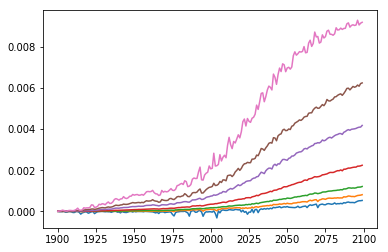

In [27]:

print(len(Time))
print(len(SL_wTd_nos_base_R0_RCP26_cdf[0:-1,500]))
plt.plot(Time,SL_wTd_nos_base_R0_RCP26_cdf[0:-1,10])
plt.plot(Time,SL_wTd_nos_base_R0_RCP26_cdf[0:-1,50])
plt.plot(Time,SL_wTd_nos_base_R0_RCP26_cdf[0:-1,166])
plt.plot(Time,SL_wTd_nos_base_R0_RCP26_cdf[0:-1,500])
plt.plot(Time,SL_wTd_nos_base_R0_RCP26_cdf[0:-1,833])
plt.plot(Time,SL_wTd_nos_base_R0_RCP26_cdf[0:-1,950])
plt.plot(Time,SL_wTd_nos_base_R0_RCP26_cdf[0:-1,990])


In [28]:
print(SL_wTd_nos_base_R0_RCP26_cdf[-1,833])
print(SL_wTd_nos_base_R0_RCP26_cdf[-1,950])
print(SL_wTd_nos_base_R0_RCP26_cdf[-1,990])

0.004176914691925049
0.006245285272598267
0.009193837642669678
